In [9]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
%matplotlib notebook

x1 = symbols('x1')
u1 = symbols('u1')

In [10]:
def TMA(A,d): #Tridiagonal matrix algorithm . Или метод прогонки
    n = len(d)
    P = np.zeros(n - 1)
    Q = np.zeros(n - 1)
    x = np.zeros(n)
    P[0] = A[0][1] / -A[0][0]
    Q[0] = -d[0] / -A[0][0]
    for i in range(1, n - 1): # находим прогоночные коэффициенты
        a = A[i][i-1]
        b = A[i][i]
        c = A[i][i+1]
        P[i] = c/(-b-a*P[i - 1])
        Q[i] =(a*Q[i - 1]-d[i])/(-b-a*P[i - 1])
    x[-1] = (A[n - 1][n - 2]*Q[n - 2] - d[n - 1]) / (-A[n - 1][n - 1] - A[n - 1][n - 2]*P[n - 2])
    for i in range(n-2, -1, -1): # Находим неизвекстные
        x[i] = P[i] * x[i + 1] + Q[i]
    return(x)

In [11]:
def solutionMatrixStart(): # заполнение матрицы решений краевыми условиями
    x = np.linspace(x0, L, N)
    u = np.zeros((N, KT))
    
    for i in range(0, KT): 
        u[0][i] = 0
        u[-1][i] = 0

    for i in range(0, N):
        u[i][0] = 0
        if x[i] <= D:
            u[i][0] = 1
        u[0][0] = 0
    return u, x

In [12]:
D = 20. #Хаотичное движение популяции
a = 9 # Рождаймость
K = 1.5 # количество ресурсов
sigma = 5# смертность

N = 10 #количество точек по оси OX
x0 = 0. # начало отрезка 
L = 100. # конец отрезка
h = (L - x0) / (N - 1) # шаг по OX

KT = 1000 #количество точек по времени
t0 = 0. # начальный момент времени
T = 100. # конечный момент времени
tau = (T - t0) / (KT - 1) # шаг по времени

s = tau*D/h**2

A = np.zeros((N - 2, N - 2))
d = np.zeros((N - 2))

$$F(u)=au^k_j\cdot(1-u^{k+1}_j/K)- \sigma u^{k+1}_j$$

In [13]:
u, x = solutionMatrixStart()

for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/K - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]
    #print(sigma*u[0][i])

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/K - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/K - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    print (A,d)
    u[1:N - 1, i] = TMA(A, d)

[[-12.1011011   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.9009009 -0.        -0.        -0.        -0.        -0.
 -0.        -0.       ]
[[-11.62470713   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.57277145   5.           0.          

    5.        -11.5005005]] [-3.64498036e-16 -6.85032229e-16 -9.22941426e-16 -1.04953026e-15
 -1.04953026e-15 -9.22941426e-16 -6.85032229e-16 -3.64498036e-16]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.29379688e-16 -6.19031325e-16 -8.34018648e-16 -9.48411013e-16
 -9.48411013e-16

    5.        -11.5005005]] [-8.59331315e-29 -1.61501459e-28 -2.17590327e-28 -2.47434591e-28
 -2.47434591e-28 -2.17590327e-28 -1.61501459e-28 -8.59331315e-29]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-7.76537190e-29 -1.45941254e-28 -1.96626119e-28 -2.23594973e-28
 -2.23594973e-28

    5.        -11.5005005]] [-2.08251809e-40 -3.91385377e-40 -5.27312092e-40 -5.99637187e-40
 -5.99637187e-40 -5.27312092e-40 -3.91385377e-40 -2.08251809e-40]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.88187341e-40 -3.53676511e-40 -4.76507074e-40 -5.41863852e-40
 -5.41863852e-40

D = 20.0 a = 9 K = 1.5 sigma = 5


<IPython.core.display.Javascript object>


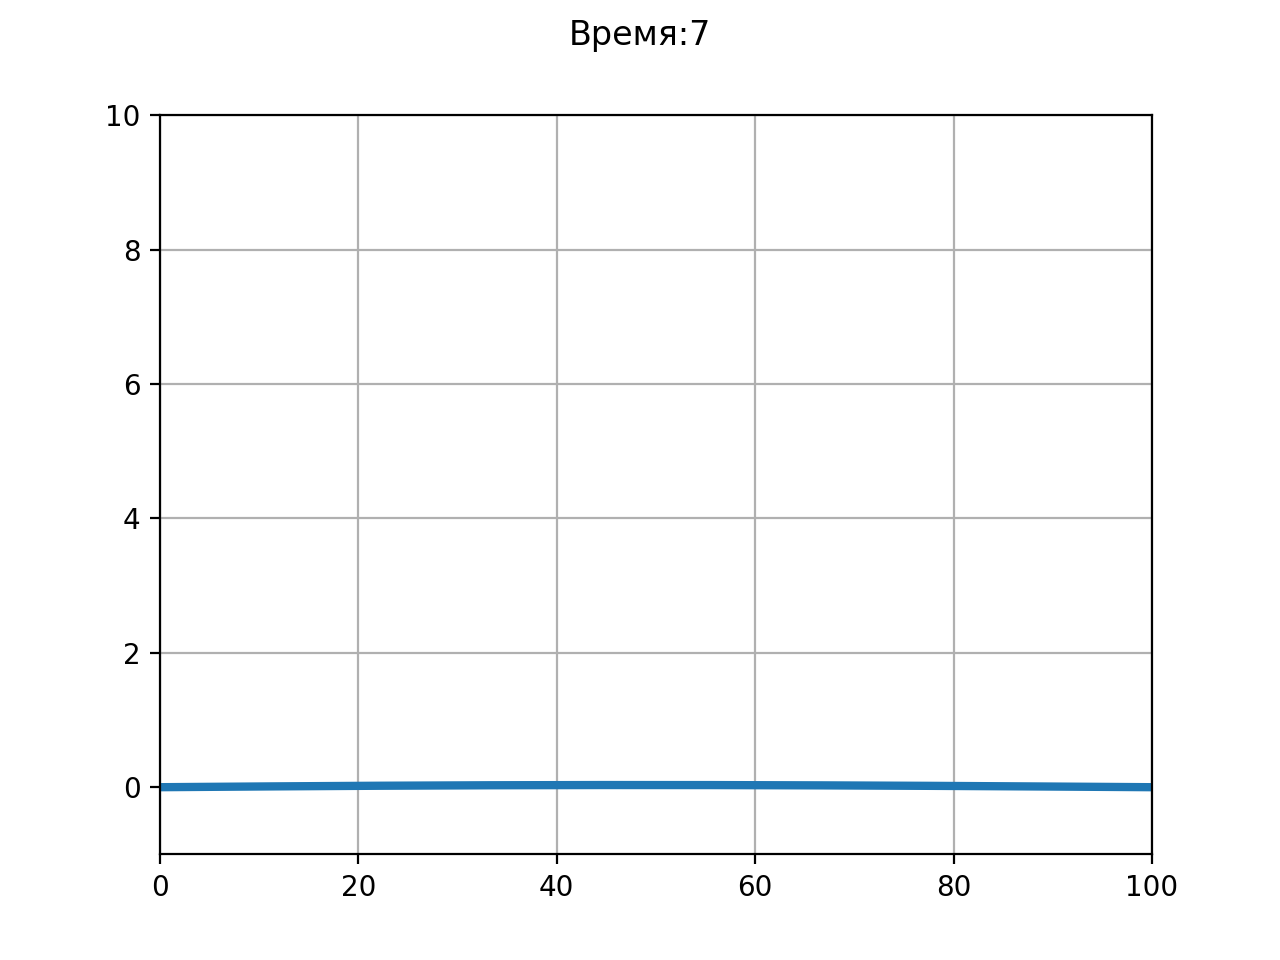

In [14]:
print("D = " + str(D) + ' a = ' + str(a) + " K = " + str(K) + " sigma = " + str(sigma))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, L), ylim=(-1, 10) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()

In [7]:
u, x = solutionMatrixStart()

def Kt(t):
    return 20/t

for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/Kt(i) - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]  

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/Kt(i) - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/Kt(i) - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    print (A,d)
    u[1:N - 1, i] = TMA(A, d)

[[-11.6006006   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.002002 -0.       -0.       -0.       -0.       -0.       -0.
 -0.      ]
[[-11.56965029   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.54073605   5.           0.           0.
   

    0.           5.         -11.91185956]] [-0.04569133 -0.08131744 -0.10424709 -0.11520455 -0.11520455 -0.10424709
 -0.08131744 -0.04569133]
[[-11.91183854   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -12.2325658    5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -12.43899339   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -12.53763997   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -12.53763997
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -12.43899339   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -12.2325658    5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.91183854]] [-0.0455204  -0.08101343 -0.10385757 -0.1

    0.           5.         -11.90898524]] [-0.02231413 -0.03972573 -0.05094183 -0.05630516 -0.05630516 -0.05094183
 -0.03972573 -0.02231413]
[[-11.90898022   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -12.22771515   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -12.43303635   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -12.53121719   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -12.53121719
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -12.43303635   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -12.22771515   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.90898022]] [-0.02227328 -0.03965303 -0.05084864 -0.0

    0.           5.         -11.90810435]] [-0.01514751 -0.02696972 -0.0345873  -0.0382306  -0.0382306  -0.0345873
 -0.02696972 -0.01514751]
[[-11.90810204   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -12.22622406   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -12.43120429   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -12.52924136   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -12.52924136
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -12.43120429   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -12.22622406   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.90810204]] [-0.01512868 -0.0269362  -0.03454431 -0.03

D = 20.0 a = 20 K = 20/t sigma = 5


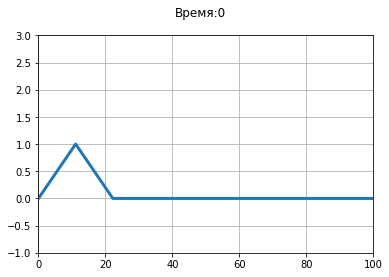

In [8]:
print("D = " + str(D) + ' a = ' + str(a) + " K = 20/t" + " sigma = " + str(sigma))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(0, L), ylim=(-1, 3) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()

In [45]:
K = 10
K1 = 1

def KTI(u1):
    return K + K1 * integrate(u1, (x1, x0, L))


u, x = solutionMatrixStart()
for i in range(1,KT): #заполняем трехдиагональную матрицу Ax=d
    A[0, 0] = - 2*sigma - (a*tau*u[1][i - 1])/KTI(u[1][i-1]) - sigma*tau - 1
    A[0, 1] = sigma
    d[0] = (a*tau+1)*(-u[1][i - 1]) - sigma*u[0][i]  

    for j in range(1, N-3):
        A[j, j - 1] = sigma
        A[j, j] = - 2*sigma - (a*tau*u[j + 1][i - 1])/KTI(u[j][i - 1]) - sigma*tau - 1
        A[j, j + 1] = sigma
        d[j] = (a*tau+1)*(-u[j + 1][i - 1])
    
    A[N - 3, N - 3] = - 2*sigma - (a*tau*u[N-2][i - 1])/KTI(u[N-2][i - 1]) - sigma*tau - 1
    A[N - 3, N - 4] = sigma
    d[N - 3] = (a*tau+1)*(-u[N-2][i - 1]) - sigma*u[N - 1][i]
    print (A,d)
    u[1:N - 1, i] = TMA(A, d)

[[-11.50869051   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.5005005    5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.5005005    5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.5005005    5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.5005005
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.5005005    5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.5005005    5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.5005005 ]] [-1.9009009 -0.        -0.        -0.        -0.        -0.
 -0.        -0.       ]
[[-11.50670341   5.           0.           0.           0.
    0.           0.           0.        ]

[[-11.50127556   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50195463   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.5023177    5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50245957   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.5024046
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50217123   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50177082   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50126357]] [-0.01789311 -0.03357019 -0.0451142  -0.05114686 -0.05098651 -0.04470797
 -0.03310773 -0.01759071]
[[-11.50120367   5.           0.           0.           0.
    0.           0.       

[[-11.50082444   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50110928   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50129552   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50138443   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50137408
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50126873   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50107748   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50082443]] [-0.00709012 -0.01332427 -0.01795072 -0.02041206 -0.02041191 -0.01795033
 -0.0133238  -0.00708978]
[[-11.50079414   5.           0.           0.           0.
    0.           0.      

[[-11.50062058   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50072616   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50080101   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50083931   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50083778
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.5007971    5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50072165   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50062058]] [-0.00256782 -0.00482581 -0.00650167 -0.00739335 -0.00739336 -0.00650169
 -0.00482583 -0.00256783]
[[-11.50060913   5.           0.           0.           0.
    0.           0.      

[[-11.50054443   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50058306   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50061126   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50062605   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50062584
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50061072   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50058245   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50054443]] [-0.00093147 -0.00175057 -0.00235852 -0.002682   -0.002682   -0.00235852
 -0.00175057 -0.00093147]
[[-11.50054021   5.           0.           0.           0.
    0.           0.      

[[-11.50050922   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50051688   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50052255   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50052556   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50052555
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50052253   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50051686   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050922]] [-0.00018408 -0.00034595 -0.0004661  -0.00053003 -0.00053003 -0.0004661
 -0.00034595 -0.00018408]
[[-11.50050838   5.           0.           0.           0.
    0.           0.       

[[-11.50050191   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50050315   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050407   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50050455   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50050455
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050406   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50050315   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050191]] [-2.97159902e-05 -5.58477790e-05 -7.52434904e-05 -8.55637275e-05
 -8.55637275e-05 -7.52434904e-05 -5.58477790e-05 -2.97159902e-05]
[[-11.50050177   5.           0.           0.       

[[-11.50050078   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50050102   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050121   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.5005013    5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.5005013
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050121   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50050102   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050078]] [-5.87502843e-06 -1.10414412e-05 -1.48760927e-05 -1.69164680e-05
 -1.69164680e-05 -1.48760927e-05 -1.10414412e-05 -5.87502843e-06]
[[-11.50050075   5.           0.           0.        

[[-11.50050056   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.5005006    5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050064   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50050066   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50050066
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050064   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.5005006    5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050056]] [-1.16154141e-06 -2.18298376e-06 -2.94112604e-06 -3.34452511e-06
 -3.34452511e-06 -2.94112604e-06 -2.18298376e-06 -1.16154141e-06]
[[-11.50050055   5.           0.           0.       

[[-11.50050052   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50050054   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050056   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50050056   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50050056
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050056   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50050054   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050052]] [-4.66712157e-07 -8.77131936e-07 -1.18175666e-06 -1.34384408e-06
 -1.34384408e-06 -1.18175666e-06 -8.77131936e-07 -4.66712157e-07]
[[-11.50050052   5.           0.           0.       

[[-11.50050051   5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50050052   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050052   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50050053   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50050053
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050052   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50050052   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.50050051]] [-1.87526927e-07 -3.52435339e-07 -4.74834846e-07 -5.39962264e-07
 -5.39962264e-07 -4.74834846e-07 -3.52435339e-07 -1.87526927e-07]
[[-11.50050051   5.           0.           0.       

[[-11.5005005    5.           0.           0.           0.
    0.           0.           0.        ]
 [  5.         -11.50050051   5.           0.           0.
    0.           0.           0.        ]
 [  0.           5.         -11.50050051   5.           0.
    0.           0.           0.        ]
 [  0.           0.           5.         -11.50050051   5.
    0.           0.           0.        ]
 [  0.           0.           0.           5.         -11.50050051
    5.           0.           0.        ]
 [  0.           0.           0.           0.           5.
  -11.50050051   5.           0.        ]
 [  0.           0.           0.           0.           0.
    5.         -11.50050051   5.        ]
 [  0.           0.           0.           0.           0.
    0.           5.         -11.5005005 ]] [-6.80894496e-08 -1.27966307e-07 -1.72408538e-07 -1.96055756e-07
 -1.96055756e-07 -1.72408538e-07 -1.27966307e-07 -6.80894496e-08]
[[-11.5005005    5.           0.           0.       

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.47227075e-08 -4.64634915e-08 -6.26000928e-08 -7.11861990e-08
 -7.11861990e-08 -6.26000928e-08 -4.64634915e-08 -2.47227075e-08]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.41696131e-09 -8.30117189e-09 -1.11841386e-08 -1.27181332e-08
 -1.27181332e-08 -1.11841386e-08 -8.30117189e-09 -4.41696131e-09]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-6.44398331e-10 -1.21107271e-09 -1.63167385e-09 -1.85547105e-09
 -1.85547105e-09 -1.63167385e-09 -1.21107271e-09 -6.44398331e-10]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-7.67694562e-11 -1.44279383e-10 -1.94387087e-10 -2.21048839e-10
 -2.21048839e-10 -1.94387087e-10 -1.44279383e-10 -7.67694562e-11]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.78743457e-11 -5.23866339e-11 -7.05803209e-11 -8.02609796e-11
 -8.02609796e-11 -7.05803209e-11 -5.23866339e-11 -2.78743457e-11]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.50022133e-12 -8.45764955e-12 -1.13949604e-11 -1.29578709e-11
 -1.29578709e-11 -1.13949604e-11 -8.45764955e-12 -4.50022133e-12]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.63399262e-12 -3.07090162e-12 -4.13741456e-12 -4.70489424e-12
 -4.70489424e-12 -4.13741456e-12 -3.07090162e-12 -1.63399262e-12]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-5.93289017e-13 -1.11501862e-12 -1.50226053e-12 -1.70830764e-12
 -1.70830764e-12 -1.50226053e-12 -1.11501862e-12 -5.93289017e-13]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-7.82165658e-14 -1.46999059e-13 -1.98051297e-13 -2.25215625e-13
 -2.25215625e-13 -1.98051297e-13 -1.46999059e-13 -7.82165658e-14]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.56635412e-14 -4.82316807e-14 -6.49823676e-14 -7.38952219e-14
 -7.38952219e-14 -6.49823676e-14 -4.82316807e-14 -2.56635412e-14]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-8.42043296e-15 -1.58252374e-14 -2.13212847e-14 -2.42456704e-14
 -2.42456704e-14 -2.13212847e-14 -1.58252374e-14 -8.42043296e-15]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.03871786e-15 -3.83153626e-15 -5.16221483e-15 -5.87025412e-15
 -5.87025412e-15 -5.16221483e-15 -3.83153626e-15 -2.03871786e-15]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-6.04472557e-16 -1.13603680e-15 -1.53057824e-15 -1.74050936e-15
 -1.74050936e-15 -1.53057824e-15 -1.13603680e-15 -6.04472557e-16]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

    5.        -11.5005005]] [-1.98332747e-16 -3.72743638e-16 -5.02196145e-16 -5.71076386e-16
 -5.71076386e-16 -5.02196145e-16 -3.72743638e-16 -1.98332747e-16]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.79223952e-16 -3.36830850e-16 -4.53810977e-16 -5.16054803e-16
 -5.16054803e-16

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-6.50747139e-17 -1.22300457e-16 -1.64774960e-16 -1.87375171e-16
 -1.87375171e-16 -1.64774960e-16 -1.22300457e-16 -6.50747139e-17]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.36280828e-17 -4.44062702e-17 -5.98284060e-17 -6.80343530e-17
 -6.80343530e-17 -5.98284060e-17 -4.44062702e-17 -2.36280828e-17]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.81467617e-18 -7.16924610e-18 -9.65909914e-18 -1.09839223e-17
 -1.09839223e-17 -9.65909914e-18 -7.16924610e-18 -3.81467617e-18]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.38507693e-18 -2.60309313e-18 -3.50713789e-18 -3.98817006e-18
 -3.98817006e-18 -3.50713789e-18 -2.60309313e-18 -1.38507693e-18]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.54455887e-19 -8.54097687e-19 -1.15072270e-18 -1.30855357e-18
 -1.30855357e-18 -1.15072270e-18 -8.54097687e-19 -4.54455887e-19]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.49110962e-19 -2.80236942e-19 -3.77562211e-19 -4.29347904e-19
 -4.29347904e-19 -3.77562211e-19 -2.80236942e-19 -1.49110962e-19]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.89246145e-20 -9.19481985e-20 -1.23881473e-19 -1.40872813e-19
 -1.40872813e-19 -1.23881473e-19 -9.19481985e-20 -4.89246145e-20]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-8.74087647e-21 -1.64274742e-20 -2.21326762e-20 -2.51683507e-20
 -2.51683507e-20 -2.21326762e-20 -1.64274742e-20 -8.74087647e-21]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.15235799e-21 -2.16572460e-21 -2.91787286e-21 -3.31808259e-21
 -3.31808259e-21 -2.91787286e-21 -2.16572460e-21 -1.15235799e-21]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.78098764e-22 -7.10593236e-22 -9.57379677e-22 -1.08869200e-21
 -1.08869200e-21 -9.57379677e-22 -7.10593236e-22 -3.78098764e-22]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.24057520e-22 -2.33151873e-22 -3.14124669e-22 -3.57209393e-22
 -3.57209393e-22 -3.14124669e-22 -2.33151873e-22 -1.24057520e-22]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.50442452e-23 -8.46554897e-23 -1.14056033e-22 -1.29699735e-22
 -1.29699735e-22 -1.14056033e-22 -8.46554897e-23 -4.50442452e-23]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.63551877e-23 -3.07376983e-23 -4.14127889e-23 -4.70928860e-23
 -4.70928860e-23 -4.14127889e-23 -3.07376983e-23 -1.63551877e-23]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-5.36628052e-24 -1.00853084e-23 -1.35878993e-23 -1.54515889e-23
 -1.54515889e-23 -1.35878993e-23 -1.00853084e-23 -5.36628052e-24]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.94845145e-24 -3.66189090e-24 -4.93365226e-24 -5.61034235e-24
 -5.61034235e-24 -4.93365226e-24 -3.66189090e-24 -1.94845145e-24]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.48110529e-25 -6.54233790e-25 -8.81446801e-25 -1.00234432e-24
 -1.00234432e-24 -8.81446801e-25 -6.54233790e-25 -3.48110529e-25]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.26396013e-25 -2.37546802e-25 -3.20045941e-25 -3.63942816e-25
 -3.63942816e-25 -3.20045941e-25 -2.37546802e-25 -1.26396013e-25]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.58933324e-26 -8.62512516e-26 -1.16205997e-25 -1.32144584e-25
 -1.32144584e-25 -1.16205997e-25 -8.62512516e-26 -4.58933324e-26]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-6.69545981e-27 -1.25833484e-26 -1.69534994e-26 -1.92788082e-26
 -1.92788082e-26 -1.69534994e-26 -1.25833484e-26 -6.69545981e-27]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.43106530e-27 -4.56890825e-27 -6.15567344e-27 -6.99997356e-27
 -6.99997356e-27 -6.15567344e-27 -4.56890825e-27 -2.43106530e-27]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.20500758e-28 -6.02344394e-28 -8.11536406e-28 -9.22845151e-28
 -9.22845151e-28 -8.11536406e-28 -6.02344394e-28 -3.20500758e-28]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.05159109e-28 -1.97634478e-28 -2.66272212e-28 -3.02793588e-28
 -3.02793588e-28 -2.66272212e-28 -1.97634478e-28 -1.05159109e-28]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.38637058e-29 -2.60552442e-29 -3.51041355e-29 -3.99189500e-29
 -3.99189500e-29 -3.51041355e-29 -2.60552442e-29 -1.38637058e-29]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.54880348e-30 -8.54895412e-30 -1.15179747e-29 -1.30977576e-29
 -1.30977576e-29 -1.15179747e-29 -8.54895412e-30 -4.54880348e-30]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.34870397e-30 -2.53473433e-30 -3.41503833e-30 -3.88343830e-30
 -3.88343830e-30 -3.41503833e-30 -2.53473433e-30 -1.34870397e-30]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

    5.        -11.5005005]] [-5.41915074e-31 -1.01846719e-30 -1.37217714e-30 -1.56038227e-30
 -1.56038227e-30 -1.37217714e-30 -1.01846719e-30 -5.41915074e-31]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.89703100e-31 -9.20340779e-31 -1.23997178e-30 -1.41004388e-30
 -1.41004388e-30

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-7.90609530e-32 -1.48585988e-31 -2.00189360e-31 -2.27646941e-31
 -2.27646941e-31 -2.00189360e-31 -1.48585988e-31 -7.90609530e-32]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.87063690e-32 -5.39503262e-32 -7.26870778e-32 -8.26566951e-32
 -8.26566951e-32 -7.26870778e-32 -5.39503262e-32 -2.87063690e-32]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.04230418e-32 -1.95889110e-32 -2.63920683e-32 -3.00119528e-32
 -3.00119528e-32 -2.63920683e-32 -1.95889110e-32 -1.04230418e-32]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.68276578e-33 -3.16256517e-33 -4.26091253e-33 -4.84533095e-33
 -4.84533095e-33 -4.26091253e-33 -3.16256517e-33 -1.68276578e-33]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.71676994e-34 -5.10585733e-34 -6.87910298e-34 -7.82262728e-34
 -7.82262728e-34 -6.87910298e-34 -5.10585733e-34 -2.71676994e-34]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.38613561e-35 -8.24323854e-35 -1.11060852e-34 -1.26293742e-34
 -1.26293742e-34 -1.11060852e-34 -8.24323854e-35 -4.38613561e-35]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.43912956e-35 -2.70467886e-35 -3.64400397e-35 -4.14380843e-35
 -4.14380843e-35 -3.64400397e-35 -2.70467886e-35 -1.43912956e-35]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-5.22535875e-36 -9.82046211e-36 -1.32310728e-35 -1.50458209e-35
 -1.50458209e-35 -1.32310728e-35 -9.82046211e-36 -5.22535875e-36]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.54930019e-36 -2.91173191e-36 -3.92296579e-36 -4.46103210e-36
 -4.46103210e-36 -3.92296579e-36 -2.91173191e-36 -1.54930019e-36]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-5.08338980e-37 -9.55364776e-37 -1.28715948e-36 -1.46370376e-36
 -1.46370376e-36 -1.28715948e-36 -9.55364776e-37 -5.08338980e-37]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.50720690e-37 -2.83262241e-37 -3.81638184e-37 -4.33982931e-37
 -4.33982931e-37 -3.81638184e-37 -2.83262241e-37 -1.50720690e-37]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-5.47254185e-38 -1.02850144e-37 -1.38569624e-37 -1.57575562e-37
 -1.57575562e-37 -1.38569624e-37 -1.02850144e-37 -5.47254185e-38]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.79558898e-38 -3.37460343e-38 -4.54659090e-38 -5.17019241e-38
 -5.17019241e-38 -4.54659090e-38 -3.37460343e-38 -1.79558898e-38]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.34740035e-39 -8.17044005e-39 -1.10080041e-38 -1.25178404e-38
 -1.25178404e-38 -1.10080041e-38 -8.17044005e-39 -4.34740035e-39]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.28898866e-39 -2.42250627e-39 -3.26383386e-39 -3.71149493e-39
 -3.71149493e-39 -3.26383386e-39 -2.42250627e-39 -1.28898866e-39]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-3.82180530e-40 -7.18264447e-40 -9.67715072e-40 -1.10044498e-39
 -1.10044498e-39 -9.67715072e-40 -7.18264447e-40 -3.82180530e-40]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.13315161e-40 -2.12962841e-40 -2.86924059e-40 -3.26278002e-40
 -3.26278002e-40 -2.86924059e-40 -2.12962841e-40 -1.13315161e-40]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-4.11437845e-41 -7.73250214e-41 -1.04179720e-40 -1.18468806e-40
 -1.18468806e-40 -1.04179720e-40 -7.73250214e-41 -4.11437845e-41]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-9.00178349e-42 -1.69178190e-41 -2.27933159e-41 -2.59196025e-41
 -2.59196025e-41 -2.27933159e-41 -1.69178190e-41 -9.00178349e-42]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-1.96948596e-42 -3.70142285e-42 -4.98691352e-42 -5.67090881e-42
 -5.67090881e-42 -4.98691352e-42 -3.70142285e-42 -1.96948596e-42]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

    5.        -11.5005005]] [-2.87331806e-43 -5.40007156e-43 -7.27549674e-43 -8.27338963e-43
 -8.27338963e-43 -7.27549674e-43 -5.40007156e-43 -2.87331806e-43]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.59648205e-43 -4.87979005e-43 -6.57452335e-43 -7.47627210e-43
 -7.47627210e-43

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-9.42760857e-44 -1.77181084e-43 -2.38715429e-43 -2.71457170e-43
 -2.71457170e-43 -2.38715429e-43 -1.77181084e-43 -9.42760857e-44]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.52593765e-44 -4.74720993e-44 -6.39589864e-44 -7.27314758e-44
 -7.27314758e-44 -6.39589864e-44 -4.74720993e-44 -2.52593765e-44]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-8.28782295e-45 -1.55760121e-44 -2.09855044e-44 -2.38638351e-44
 -2.38638351e-44 -2.09855044e-44 -1.55760121e-44 -8.28782295e-45]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-2.45730988e-45 -4.61823191e-45 -6.22212703e-45 -7.07554179e-45
 -7.07554179e-45 -6.22212703e-45 -4.61823191e-45 -2.45730988e-45]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -11.5005005   5.          0.          0.          0.
    0.          0.       ]
 [  0.          5.        -11.5005005   5.          0.          0.
    0.          0.       ]
 [  0.          0.          5.        -11.5005005   5.          0.
    0.          0.       ]
 [  0.          0.          0.          5.        -11.5005005   5.
    0.          0.       ]
 [  0.          0.          0.          0.          5.        -11.5005005
    5.          0.       ]
 [  0.          0.          0.          0.          0.          5.
  -11.5005005   5.       ]
 [  0.          0.          0.          0.          0.          0.
    5.        -11.5005005]] [-8.92228607e-46 -1.67684128e-45 -2.25920214e-45 -2.56906988e-45
 -2.56906988e-45 -2.25920214e-45 -1.67684128e-45 -8.92228607e-46]
[[-11.5005005   5.          0.          0.          0.          0.
    0.          0.       ]
 [  5.        -

SyntaxError: 'return' outside function (<ipython-input-45-1a9c787063a0>, line 25)

D = 20.0 a = 9 sigma = 5 K0 = 10 K1 = 1


<IPython.core.display.Javascript object>


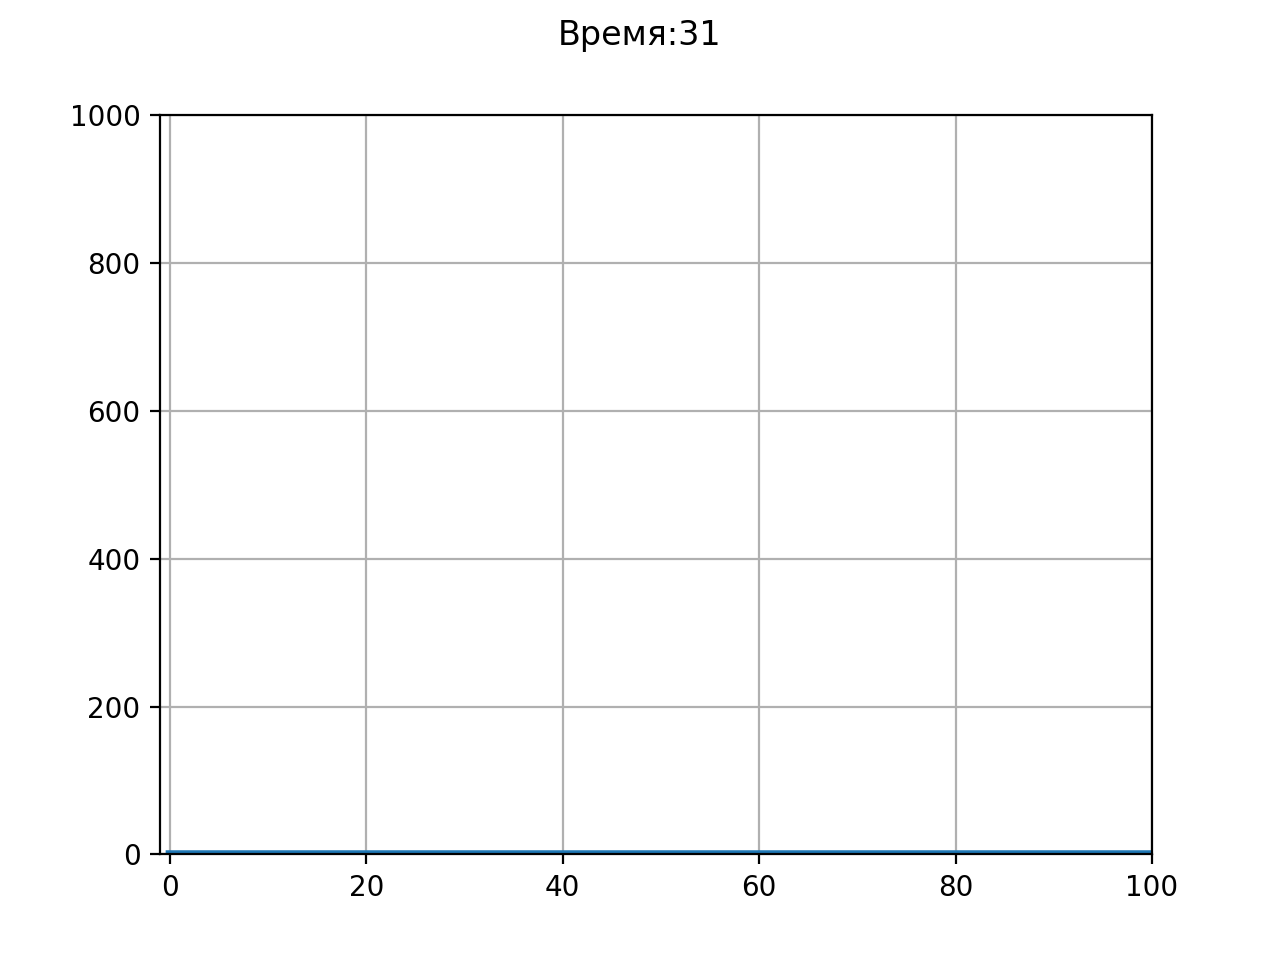

In [46]:
print("D = " + str(D) + ' a = ' + str(a) + " sigma = " + str(sigma) + " K0 = " + str(K) + " K1 = " + str(K1))
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, L), ylim=(0, 1000) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=KT,interval=500)
plt.grid(True)
plt.show()